# PROJECT TITLE: COVID-19 FAKE NEWS DETECTION MODEL

### Problem Statement:
Fake news intentionally persuades readers to accept biased or untrue beliefs by changing the way people interpret and respond to real news. The process of detecting fake news manually is relatively tedious, hence there is a need to leverage Machine Learning classifiers for this task. Due to its novelty, there are no standardised datasets for fake COVID-19 news detection as existing datasets are either not robust or recent enough for building models to accurately classify COVID-19 news. For instance, Patwa et al., (2020), benchmarked a dataset consisting of 10,700 social media posts and articles that were obtained majorly from sources such as WHO, CDC, Covid India Seva, and Indian Council of Medical Research (ICMR). This leaves out news obtainable from local sources in Nigeria.

### Aim and Objectives:
This study aims to detect fake COVID-19 news using Machine Learning classification baseline algorithms. This will be achieved through the following objectives:
1. To scrape verified Twitter handle of health organisations such as WHO, CDC, NCDC using Twitter API for COVID-19 related news and generate data.
2. To preprocess the obtained data using Python libraries such as NumPy, Pandas, and Seaborn.
3. To use Support Vector Machine (SVM), Logistic Regression, and Decision Tree Machine Learning algorithms for the classification of fake news.
4. To compare the performance of these algorithms using the Confusion Matrix and Classification Accuracy performance metrics.

### Importing Python Libraries

In [1]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neural_network import MLPClassifier
from joblib import dump, load
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import numpy as np
import itertools

In [3]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(5, 4))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True Label')
    #plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted Label')
    plt.show()

In [4]:
stops = set(stopwords.words("english"))
def cleantext(string):
    text = string.lower().split()
    text = " ".join(text)
    text = re.sub(r"http(\S)+",' ',text)    
    text = re.sub(r"www(\S)+",' ',text)
    text = re.sub(r"&",' and ',text)  
    tx = text.replace('&amp',' ')
    text = re.sub(r"[^0-9a-zA-Z]+",' ',text)
    text = text.split()
    text = [w for w in text if not w in stops]
    text = " ".join(text)
    return text

In [5]:
Train = pd.read_csv('C:/Users/teedaniels/Desktop/Datasets/Train_Data.csv')
Valid = pd.read_csv('C:/Users/teedaniels/Desktop/Datasets/Validation_Data.csv')
Test = pd.read_csv('C:/Users/teedaniels/Desktop/Datasets/Test_Data.csv')

In [6]:
Train['tweet'] = Train['tweet'].map(lambda x: cleantext(x))
Valid['tweet'] = Valid['tweet'].map(lambda x: cleantext(x))
Test['tweet'] = Test['tweet'].map(lambda x: cleantext(x))

In [7]:
def print_metrices(pred,true):
    print(confusion_matrix(true,pred))
    print(classification_report(true,pred,))
    print("Accuracy : ",accuracy_score(pred,true))
    print("Precison : ",precision_score(pred,true, average = 'weighted'))
    print("Recall : ",recall_score(pred,true,  average = 'weighted'))
    print("F1 : ",f1_score(pred,true,  average = 'weighted'))

In [9]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LinearSVC(c=2))
    ])
fit = pipeline.fit(Train['tweet'],Train['label'])
print('SVM')
print ('test:')
prediction = pipeline.predict(Test['tweet'])
print_metrices(prediction,Test['label'])
plot_confusion_matrix(confusion_matrix(Test['label'], prediction), target_names=['fake','real'], normalize = False, \
                      title = 'Confusion Matrix of SVM on Test Dataset')

val_ori = pd.read_csv('C:/Users/teedaniels/Desktop/Datasets/Test_Data.csv')
svm_val_misclass_df = val_ori[prediction!=Test['label']]

TypeError: __init__() got an unexpected keyword argument 'c'

Logistic Regression
test:
[[ 978   78]
 [ 112 1059]]
              precision    recall  f1-score   support

        fake       0.90      0.93      0.91      1056
        real       0.93      0.90      0.92      1171

    accuracy                           0.91      2227
   macro avg       0.91      0.92      0.91      2227
weighted avg       0.92      0.91      0.91      2227

Accuracy :  0.914683430624158
Precison :  0.9150159666808746
Recall :  0.914683430624158
F1 :  0.9146359920313665


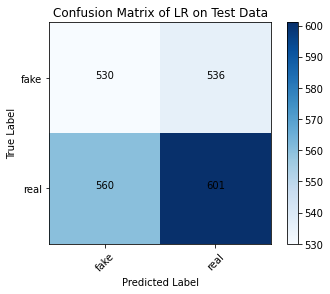

In [14]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', LogisticRegression())
    ])
fit = pipeline.fit(Train['tweet'],Train['label'])
print('Logistic Regression')
print ('test:')
prediction = pipeline.predict(Test['tweet'])

print_metrices(prediction,Test['label'])
plot_confusion_matrix(confusion_matrix(Valid['label'], prediction),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion Matrix of LR on Test Data')

Decision Tree
Test:
[[ 888  168]
 [ 155 1016]]
              precision    recall  f1-score   support

        fake       0.85      0.84      0.85      1056
        real       0.86      0.87      0.86      1171

    accuracy                           0.85      2227
   macro avg       0.85      0.85      0.85      2227
weighted avg       0.85      0.85      0.85      2227

Accuracy :  0.8549618320610687
Precison :  0.8551178402890582
Recall :  0.8549618320610687
F1 :  0.8550106559396825


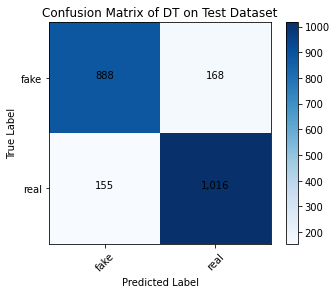

In [9]:
pipeline = Pipeline([
        ('bow', CountVectorizer()),  
        ('tfidf', TfidfTransformer()),  
        ('c', tree.DecisionTreeClassifier())
    ])
fit = pipeline.fit(Train['tweet'],Train['label'])
print('Decision Tree')
print ('Test:')
prediction = pipeline.predict(Test['tweet'])

print_metrices(prediction, Test['label'])
plot_confusion_matrix(confusion_matrix(Test['label'], prediction),target_names=['fake','real'], normalize = False, \
                      title = 'Confusion Matrix of DT on Test Dataset')

In [5]:
#Check = pd.read_excel('C:/Users/teedaniels/Desktop/Datasets/Validation_Data.csv')
#svm_val_misclass_df = Check[pred!=Valid['label']]
#svm_val_misclass_df = val_ori[pred!=val['label']]

In [ ]:
svm_val_misclass_df.info()
svm_val_misclass_df.to_excel('svm_val_misclassified.xlsx')